<a href="https://colab.research.google.com/github/aloy4646/students-grade-classification/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikasi dengan Neural Network

In [27]:
import pandas as pd
import keras,os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPool1D, Dropout
from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical

## Load Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/tubesML/student-por-preprocessed.csv')
dataset.head(10)

,higher_yes,school_MS,studytime,Medu,Fedu,reason_reputation,address_U,internet_yes,failures,reason_other,famsup_yes,G1,G2,G3
0,0.344648,-0.730381,0.083588,1.309206,1.539528,-0.53120,0.659674,-1.814644,-0.374017,-0.352975,-1.258258,-4.152268,-0.195669,11
1,0.344648,-0.730381,0.083588,-1.335010,-1.187916,-0.53120,0.659674,0.550223,-0.374017,-0.352975,0.793525,-0.873896,-0.195669,11
2,0.344648,-0.730381,0.083588,-1.335010,-1.187916,-0.53120,0.659674,0.550223,-0.374017,2.828699,-1.258258,0.218895,0.490758,12
3,0.344648,-0.730381,1.289120,1.309206,-0.278768,-0.53120,0.659674,0.550223,-0.374017,-0.352975,0.793525,0.947422,0.833972,14
4,0.344648,-0.730381,0.083588,0.427801,0.630380,-0.53120,0.659674,-1.814644,-0.374017,-0.352975,0.793525,-0.145369,0.490758,13
5,0.344648,-0.730381,0.083588,1.309206,0.630380,1.87963,0.659674,0.550223,-0.374017,-0.352975,0.793525,0.218895,0.147545,13
6,0.344648,-0.730381,0.083588,-0.453605,-0.278768,-0.53120,0.659674,0.550223,-0.374017,-0.352975,-1.258258,0.583158,0.147545,13
7,0.344648,-0.730381,0.083588,1.309206,1.539528,-0.53120,0.659674,-1.814644,-0.374017,-0.352975,0.793525,-0.509632,0.490758,13
8,0.344648,-0.730381,0.083588,0.427801,-0.278768,-0.53120,0.659674,0.550223,-0.374017,-0.352975,0.793525,1.311686,1.520399,17
9,0.344648,-0.730381,0.083588,0.427801,1.539528,-0.53120,0.659674,0.550223,-0.374017,-0.352975,0.793525,0.218895,0.147545,13


In [5]:
X = dataset.drop('G3', axis=1)
y = dataset['G3']

In [6]:
len(np.unique(y))

13

hanya tersisa 13 class yang terdapat pada dataset, namun class tertinggi bernilai 18, sehingga num_classes = 19 (0-18) saat y diubah menjadi categorical

In [7]:
y = tf.keras.utils.to_categorical(y, num_classes=19)

## Membagi data train dan test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Mengubah shape X agar dapat di training menggunakan CNN

In [9]:
print(np.shape(X_train))

(1081, 13)


In [10]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

## Membuat model CNN

In [31]:
model = Sequential()

model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPool1D(2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPool1D(2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(19, activation='softmax'))

In [32]:
opt = SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 11, 64)            256       
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 5, 64)            0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 3, 128)            24704     
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 512)              

## Training model

In [35]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=64)

Epoch 1/1000
17/17 [==============================] - 1s 32ms/step - loss: 1.7829 - accuracy: 0.4126 - val_loss: 2.0532 - val_accuracy: 0.3173
Epoch 2/1000
17/17 [==============================] - 0s 17ms/step - loss: 1.7738 - accuracy: 0.4015 - val_loss: 2.0566 - val_accuracy: 0.3137
Epoch 3/1000
17/17 [==============================] - 0s 14ms/step - loss: 1.7657 - accuracy: 0.4089 - val_loss: 2.0500 - val_accuracy: 0.3063
Epoch 4/1000
17/17 [==============================] - 0s 13ms/step - loss: 1.7604 - accuracy: 0.4126 - val_loss: 2.0552 - val_accuracy: 0.3137
Epoch 5/1000
17/17 [==============================] - 0s 6ms/step - loss: 1.7558 - accuracy: 0.4061 - val_loss: 2.0422 - val_accuracy: 0.3210
Epoch 6/1000
17/17 [==============================] - 0s 6ms/step - loss: 1.7488 - accuracy: 0.4107 - val_loss: 2.0318 - val_accuracy: 0.3247
Epoch 7/1000
17/17 [==============================] - 0s 7ms/step - loss: 1.7402 - accuracy: 0.4089 - val_loss: 2.0260 - val_accuracy: 0.3100
Ep

## Plot hasil training

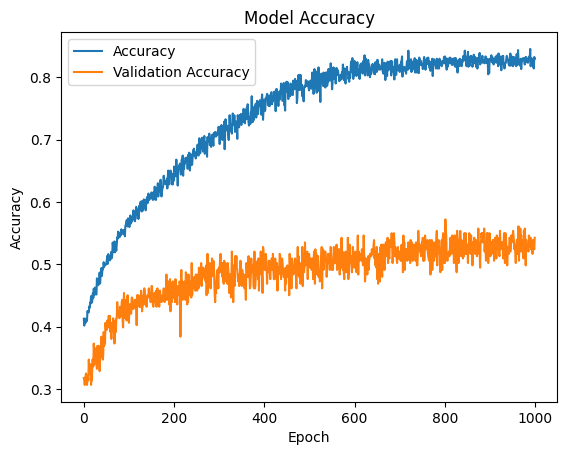

In [36]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

## Testing

In [37]:
def plot_confusion_matrix(cm):
  class_names = ['0','7','8','9','10','11','12','13','14','15','16','17','18']
  fig, ax = plt.subplots()
  im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  cbar = ax.figure.colorbar(im, ax=ax)

  ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=class_names,
        yticklabels=class_names,
        title='Confusion matrix',
        ylabel='True label',
        xlabel='Predicted label')

  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")

  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j], 'd'),
                  ha="center", va="center",
                  color="white" if cm[i, j] > thresh else "black")

  fig.tight_layout()
  plt.show()

9/9 [==============================] - 0s 3ms/step


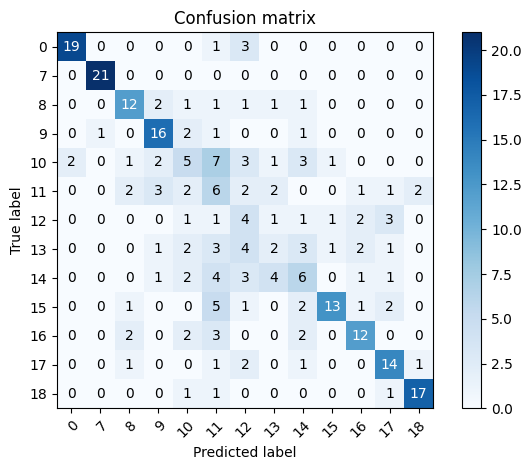

In [38]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
confusion_mtx = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
plot_confusion_matrix(confusion_mtx)

In [39]:
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)
precision = precision_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
recall = recall_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.54
Precision: 0.55
Recall: 0.54
F1 score: 0.54


In [40]:
model.save('/content/drive/MyDrive/tubesML/modelNeuralNetwork.h5')

## Testing dengan training data untuk mengecek overfitting

In [41]:
model = tf.keras.models.load_model('/content/drive/MyDrive/tubesML/modelNeuralNetwork.h5')

34/34 [==============================] - 0s 3ms/step


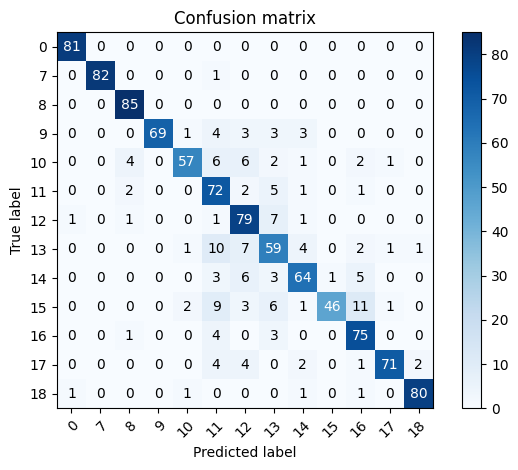

In [42]:
y_pred = model.predict(X_train)
y_pred_classes = np.argmax(y_pred, axis=1)
confusion_mtx = confusion_matrix(np.argmax(y_train, axis=1), y_pred_classes)

plot_confusion_matrix(confusion_mtx)

<h2> Model yang dihasilkan Overfit</h2>